# Date time with pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("white")

## Today
- pd.to_datetime

In [5]:
pd.to_datetime("Monday 27 July 2020 8:34 am")

Timestamp('2020-07-27 08:34:00')

In [6]:
pd.to_datetime("27.07.2020")

Timestamp('2020-07-27 00:00:00')

In [7]:
pd.to_datetime("27/07/2020")

Timestamp('2020-07-27 00:00:00')

In [8]:
pd.to_datetime("07/27/2020")

Timestamp('2020-07-27 00:00:00')

In [9]:
pd.to_datetime("27.07.20 9:04:01")

Timestamp('2020-07-27 09:04:01')

In [10]:
One_day = pd.to_datetime("27.07.20 08:34:45 am")

In [11]:
pd.to_datetime("today")

Timestamp('2020-07-27 11:59:52.527857')

In [12]:
pd.to_datetime(1595838885, unit = 's')

Timestamp('2020-07-27 08:34:45')

## Accesing DateTime indices

- ts.dt.year
- ts.dt.month
- ts.dt.month_name()
- ts.dt.day
- ts.dt.weekday: Monday == 0 … Sunday == 6
- ts.dt.day_name()
- ts.dt.minute
- ts.dt.quarter

In [13]:
One_day.year

2020

In [14]:
One_day.weekday()

0

### Crate time range

In [15]:
pd.date_range('1 July 2020', periods=27, freq='D')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pd.date_range('1 July 2020', '27 July 2020', freq='D')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', freq='D')

In [17]:
dates = pd.date_range('1 July 2020', '27 July 2020', periods= 27)

In [18]:
max_temperature = [23,25,24,26,28,22,22,28,20,25,21,20,24,29,26,19,21,26,30,23,22,22,23,25,25,24,25]
min_temperature = [17,16,16,15,19,13,12,13,14,12,11,10,11,13,16,12,11,13,16,15,11,12,13,14,17,16,16]

In [19]:
df = pd.DataFrame({'dates': dates, 'max_t': max_temperature, 'min_t': min_temperature})

In [20]:
df

,dates,max_t,min_t
0,2020-07-01,23,17
1,2020-07-02,25,16
2,2020-07-03,24,16
3,2020-07-04,26,15
4,2020-07-05,28,19
5,2020-07-06,22,13
6,2020-07-07,22,12
7,2020-07-08,28,13
8,2020-07-09,20,14
9,2020-07-10,25,12


In [21]:
df.set_index(pd.to_datetime(df['dates']), inplace= True)
df.drop(['dates'], axis = 1, inplace= True)

In [22]:
df.head(10)

,max_t,min_t
dates,,
2020-07-01,23,17
2020-07-02,25,16
2020-07-03,24,16
2020-07-04,26,15
2020-07-05,28,19
2020-07-06,22,13
2020-07-07,22,12
2020-07-08,28,13
2020-07-09,20,14


(0, 35)

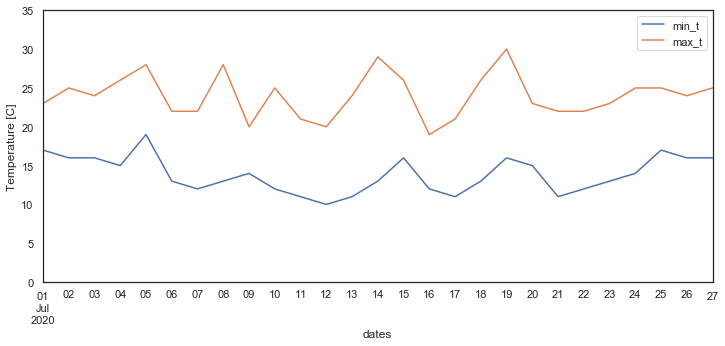

In [23]:
df.plot(y=['min_t', 'max_t'], figsize=(12,5))
plt.ylabel('Temperature [C]')
plt.ylim([0,35])

## Resample

### down

In [24]:
df.resample('3D').mean()

,max_t,min_t
dates,,
2020-07-01,24.000000,16.333333
2020-07-04,25.333333,15.666667
2020-07-07,23.333333,13.000000
2020-07-10,22.000000,11.000000
2020-07-13,26.333333,13.333333
2020-07-16,22.000000,12.000000
2020-07-19,25.000000,14.000000
2020-07-22,23.333333,13.000000
2020-07-25,24.666667,16.333333


In [25]:
df.resample('3D').max()

,max_t,min_t
dates,,
2020-07-01,25,17
2020-07-04,28,19
2020-07-07,28,14
2020-07-10,25,12
2020-07-13,29,16
2020-07-16,26,13
2020-07-19,30,16
2020-07-22,25,14
2020-07-25,25,17


### up

In [26]:
df.resample('8h').ffill()

,max_t,min_t
dates,,
2020-07-01 00:00:00,23,17
2020-07-01 08:00:00,23,17
2020-07-01 16:00:00,23,17
2020-07-02 00:00:00,25,16
2020-07-02 08:00:00,25,16
...,...,...
2020-07-25 16:00:00,25,17
2020-07-26 00:00:00,24,16
2020-07-26 08:00:00,24,16


In [27]:
df.resample('8h').interpolate(method='linear')

,max_t,min_t
dates,,
2020-07-01 00:00:00,23.000000,17.000000
2020-07-01 08:00:00,23.666667,16.666667
2020-07-01 16:00:00,24.333333,16.333333
2020-07-02 00:00:00,25.000000,16.000000
2020-07-02 08:00:00,24.666667,16.000000
...,...,...
2020-07-25 16:00:00,24.333333,16.333333
2020-07-26 00:00:00,24.000000,16.000000
2020-07-26 08:00:00,24.333333,16.000000


### Rolling averages
Very recent: https://www.zeit.de/wissen/gesundheit/coronavirus-echtzeit-karte-deutschland-landkreise-infektionen-ausbreitung#diagramm-international

In [28]:
df.rolling('3D').mean()

,max_t,min_t
dates,,
2020-07-01,23.000000,17.000000
2020-07-02,24.000000,16.500000
2020-07-03,24.000000,16.333333
2020-07-04,25.000000,15.666667
2020-07-05,26.000000,16.666667
2020-07-06,25.333333,15.666667
2020-07-07,24.000000,14.666667
2020-07-08,24.000000,12.666667
2020-07-09,23.333333,13.000000


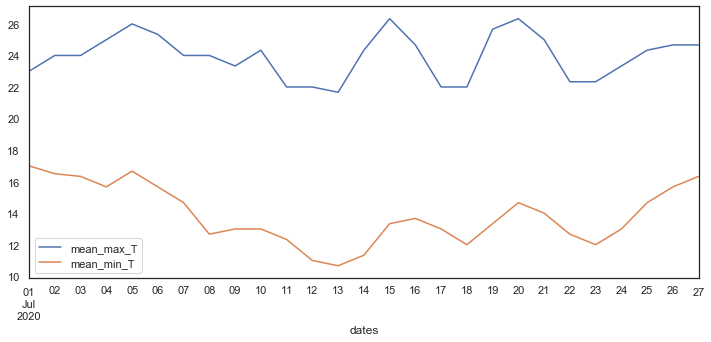

In [29]:
df.rolling('3D').mean().rename(columns={"max_t": "mean_max_T", "min_t": "mean_min_T"}).plot(figsize=(12,5))

(0, 35)

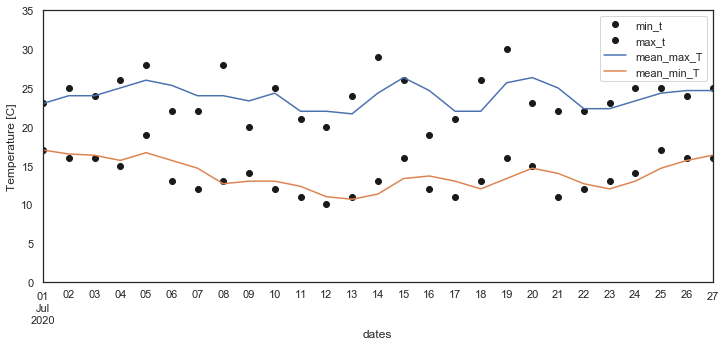

In [30]:
ax = df.plot.line( y=['min_t', 'max_t'], figsize=(12,5), color = 'k', style="o")
df.rolling('3D').mean().rename(columns={"max_t": "mean_max_T", "min_t": "mean_min_T"}).plot(ax = ax)
plt.ylabel('Temperature [C]')
plt.ylim([0,35])